
# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: 
### Below are the questions that could be asked by someone who is working for Bike Share Project:

#### The main general questions come down to the classic "Who, where, what, when, what time, why" questions:

1.	WHO uses the bike share? 
    -	The users with high trip duration (Subscriber or Customer).
    -	What is the gender (Male or Female) of the users with high usage, what are the counts or percentage of gender?
    -	What are the most popular birth years to know age group (oldest person or youngest person) who using the service more?


2.	WHERE do they use it?
    -	Where do they pick up (Start Station) and return (End Station)?
    -	Where are the stations with high registered users, what are the stations with high usage rate?
    -	Where are the customers located more (customer demographics)? 
    -	What is the most popular start station and most popular end station?
    -	What is the most popular trip?


3.	WHEN do they use it?
    -	Time of day (What is the most common time of usage for subscribers and customers?), what is the most popular hour of day for start time?
    -	Day of year (What is the most common day of usage for subscribers, and customers?), what is the most popular day of week (Sunday, Monday, etc.) for start time (Weekend or Working days)?
    -	Season (Summer, Winter, Vacations, etc.…), What is the most popular month for start time?
    -	Weather patterns (Cold or Hot weather)


4.	What time do they use it?
    -	What is the total trip duration?
    -	What is the average trip duration?


5.	Why do they use it?
    -	They use the service because it is saved time, money, have fun and good time in place, used to go and back (from home to work and vice versa) 


> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [45]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [46]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        # Reference : https://www.youtube.com/watch?v=Y2lpmFW-DcM
        trip_reader =csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        # Reference :https://www.youtube.com/watch?v=TmIJXqn6jFo
        first_trip =trip_reader.__next__() # or next(trip_reader) 
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
    
        # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [47]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    # YOUR CODE HERE
        # we can use another elif statment instead using or for say (NYC)
        # As duration given in seconds (Chicago and NYC) to convert the duration to to Minutes 
        # will do it by dividing by 60. # # ref. converter : https://www.unitconverters.net/
        # convert the data type of 'data' from string to float to count the fractions
        # print(datum['tripduration']), type the name of duration as mentioned in the excel sheet "tripduration"
        # follow this rule row['duration'] instead of row[0].
    
    if city == 'Chicago' or city == 'NYC': 
        duration = (float(datum['tripduration'])/60)  # or  datum=(float(datum['tripduration'])/60) # duration=(datum)          
        
        # As duration given in milliseconds (Washington) to convert the duration to to Minutes 
        # will do it by dividing by 60,000. # ref. converter : https://www.unitconverters.net/      
        # convert the data type of 'data' from string to float to count the fraction numbers
        # print(datum['Duration (ms)']),type the name of duration as mentioned in the excel sheet "Duration (ms)"
        # follow this rule row['duration'] instead of row[0].

    elif city == 'Washington':
        duration = (float(datum['Duration (ms)'])/60000)
    
    else:
        print( 'The City not in the Project')    
    
    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [48]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # Need to format time to for all cities to  return (month, hour, day_of_week)
    
    # To work with time we have to use this module"from datetime import datetime # operations to parse dates".    
    
    # classmethod datetime.strptime(date_string, format)
    # Return a datetime corresponding to date_string, parsed according to format. 
    # This is equivalent to datetime(*(time.strptime(date_string, format)[0:6])). 
    # ValueError is raised if the date_string and format can’t be parsed by time.strptime() or 
    # if it returns a value which isn’t a time tuple. For a complete list of formatting directives, 
    # see strftime() is [datetime object to other formats] and strptime() is [String to datetime object] Behavior.
    # strftime --> convert Datetime to String.
    # strptime --> convert String to Datetime.
    # %m 	Month as a zero-padded decimal number. 	01, 02, …, 12
    # %H 	Hour (24-hour clock) as a zero-padded decimal number. 	00, 01, …, 23
    # %A 	Weekday as locale’s full name. --- > Sunday, Monday, …, Saturday (en_US);
    # %d 	Day of the month as a zero-padded decimal number. 	01, 02, …, 31
    # %Y 	Year with century as a decimal number. 	0001, 0002, …, 2013, 2014, …, 9998, 9999
    # %M 	Minute as a zero-padded decimal number. 	00, 01, …, 59
    # https://www.tutorialspoint.com/python/time_strptime.htm
    # https://www.programiz.com/python-programming/datetime/strftime
    # Converte 'month' and 'hour' to Integer to remove leading Zero values.

    # YOUR CODE HERE
    
    # We can't use or for Washigton & Chicago because we have different start date name in Washigton we have 
    # 'Start date' name while in Chicago we have 'starttime' name 
    # Reference : https://www.youtube.com/watch?v=BSL7lOgVX-8 # Convert String Date into datetime Object format.
    # Reference : https://www.youtube.com/watch?v=eirjjyP2qcQ # Datetime Module - How to work with Dates, Times, 
    # Timedeltas, and Timezones
    
    # Washington has 'Start date' as (month/day/ year  hr:min ) '3/31/2016 22:57'
    # and 'End date' as '3/31/2016 23:04'
    # print(datum['Start date'])
    
    if city == 'Washington' :
        trip_Was      = datetime.strptime(datum['Start date'],"%m/%d/%Y %H:%M")
        month         = int(trip_Was.strftime('%m'))
        hour          = int(trip_Was.strftime('%H'))
        day_of_week   = trip_Was.strftime('%A')
    
    # Chicago has 'starttime' as (month/day/ year  hr:min )'3/31/2016 23:30')
    # and 'stoptime' as '3/31/2016 23:46'
    #print(datum['starttime'])    
        
    elif city == 'Chicago':
        trip_Chi      = datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M")
        month         = int(trip_Chi.strftime('%m'))
        hour          = int(trip_Chi.strftime('%H'))
        day_of_week   = trip_Chi.strftime('%A')
        
    # NYC has 'starttime' as (month/day/ year  hr:min:sec ) '1/1/2016 00:09:55')
    # and 'stoptime' as '1/1/2016 00:23:54'
    # print(datum['starttime'])
    elif city == 'NYC':
        trip_NYC    = datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M:%S") 
        month       = int(trip_NYC.strftime('%m'))
        hour        = int(trip_NYC.strftime('%H'))
        day_of_week = trip_NYC.strftime('%A')
        
    else:
        print('The City not in the Project')

    
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC'       : (1, 0,   'Friday' ),
         'Chicago'   : (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [49]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    # In this section will change the names of the user type to convert Washington. lable to others (NYC and Chicago) 
    # to have only Subscriber & Customer   
    
    # YOUR CODE HERE

    if city == 'Washington':
        if datum['Member Type'] == 'Registered': # if Member Type is named Registered 
            datum['Member Type'] = 'Subscriber'  # assign a new name to Member Type to be Subscriber
        elif datum['Member Type'] == 'Casual':   # if Member Type is named Casual  
             datum['Member Type']  = 'Customer'  # assign a new name to Member Type to be Customer   
        else:
            print("Not Member Type for Washington") 
        user_type = datum['Member Type']
        
    elif city == 'Chicago' or city == 'NYC':     # we can use another elif instead using or option.
        user_type = datum['usertype']
        
    else:
        Print('The City not in the Project')
      
    return user_type

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [50]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            
            # Reference : https://stackoverflow.com/questions/35514214/create-nested-dictionary-on-the-fly-in-python
            # Reference : https://docs.python.org/3/library/csv.html#reader-objects
            
            # Assign the output of the def duration_in_mins(datum, city) function.
            new_point['duration'] = duration_in_mins(row, city) 
            
            # Assign the output of the def time_of_trip(datum, city) function.
            new_point['month'], new_point['hour'], new_point['day_of_week'] = time_of_trip(row, city) 
            
            # Assign the output of the def type_of_user(datum, city) function.
            new_point['user_type'] = type_of_user(row, city) 


            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            
            # csvwriter.writerows(rows)
            # Write all elements in rows (an iterable of row objects as described above) to 
            # the writer’s file object, formatted according to the current dialect.

            trip_writer.writerow(new_point)

In [51]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 

    1. Which city has the highest number of trips?  NYC City
    2. Which city has the highest proportion of trips made by subscribers? NYC City
    3. Which city has the highest proportion of trips made by short-term customers? Chicago City


In [52]:
# Get the data file for each city        
data_file_Washington = './data/Washington-2016-Summary.csv'
data_file_Chicago = './data/Chicago-2016-Summary.csv'
data_file_NYC = './data/NYC-2016-Summary.csv'

In [53]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers   = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
                
            else:
                n_customers   += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # Compute percentage of Subscribers & Customers
        pct_subscribers = (n_subscribers/n_total)*100
        pct_customers   = (n_customers/n_total)  *100
        
        # return tallies as a tuple
        
        print('\n No.of Subscriber'+ " = " + str (n_subscribers),'\n No.of Customers' + " = " 
              + str ((n_customers)),'\n Total No. of Rider'+ " = " + str (n_total),
              '\n Percentage of Subscribers '+ " = " + str (round(pct_subscribers,2)) + " % ",
              '\n Percentage of Customers '+ " = " + str (round(pct_customers,2)) + " % ")
        return(n_subscribers, n_customers, n_total,round(pct_subscribers,2),round(pct_customers,2))
    
    
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

## Output No. of Subscribers, Customer , Total No.of (Subscribers+ Customer),Subscribers %,Customers%

number_of_trips_Washington = number_of_trips(data_file_Washington)
number_of_trips_Chicago = number_of_trips(data_file_Chicago,)
number_of_trips_NYC = number_of_trips(data_file_NYC,)


# I removed this file './examples/BayArea-Y3-Summary.csv', to make analysis only for the 3 cities only as requested.
#data_file = ['./data/Washington-2016-Summary.csv', './data/Chicago-2016-Summary.csv', './data/NYC-2016-Summary.csv']
#for datafile in data_file:
#    print(number_of_trips(datafile))
                


City: Washington

 No.of Subscriber = 51753 
 No.of Customers = 14573 
 Total No. of Rider = 66326 
 Percentage of Subscribers  = 78.03 %  
 Percentage of Customers  = 21.97 % 

City: Chicago

 No.of Subscriber = 54982 
 No.of Customers = 17149 
 Total No. of Rider = 72131 
 Percentage of Subscribers  = 76.23 %  
 Percentage of Customers  = 23.77 % 

City: NYC

 No.of Subscriber = 245896 
 No.of Customers = 30902 
 Total No. of Rider = 276798 
 Percentage of Subscribers  = 88.84 %  
 Percentage of Customers  = 11.16 % 


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 


Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. We will now try to answer few questions like - What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

What is the average trip length for each city?

    1. Average Trip Length of Washington = 19 Minutes
    2. Average Trip Length of Chicago    = 17 Minutes
    3. Average Trip Length of NYC        = 16 Minutes

What proportion of rides made in each city are longer than 30 minutes?

    1. Percentage Trips Longer Than 30 Minutes in Washington = 10.84%
    2. Percentage Trips Longer Than 30 Minutes in Chicago    = 8.33%
    3. Percentage Trips Longer Than 30 Minutes in NYC        = 7.3%




In [75]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

In [55]:
## I will need a function to convert the strings into an appropriate numeric type before you aggregate data.      
def length_of_trips(filename):
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # Initialize the variables
        total_trips       = 0
        longer_trip_count = 0
        total_trip_length = 0
        
        # Get the total trip length
        for row in reader:
            total_trips += 1
            duration = float(row['duration'])
            total_trip_length  = total_trip_length+ duration 
            if duration > 30:
                    longer_trip_count += 1           
        
        # Get Average Trip Length for each City
        average_trip_length = total_trip_length / total_trips
        
        # Get percentage of trips that are longer than 30 minutes for each city
        Percentage = (longer_trip_count /total_trips)*100
        
        # Print Average Trip Length for each City
        print('Average Trip Length '+ " = " + str (round(average_trip_length,0)) + 
              " Minutes " +" , " ,'Percentage of trips longer than 30 min.' + " = " 
              + str (round(Percentage,2))+ " %")
        
        return ( round(average_trip_length,2), round(Percentage,2) )

length_of_trips_Washington = length_of_trips(data_file_Washington)
length_of_trips_Chicago = length_of_trips(data_file_Chicago,)
length_of_trips_NYC = length_of_trips(data_file_NYC,)


City: Washington
Average Trip Length  = 19.0 Minutes  ,  Percentage of trips longer than 30 min. = 10.84 %

City: Chicago
Average Trip Length  = 17.0 Minutes  ,  Percentage of trips longer than 30 min. = 8.33 %

City: NYC
Average Trip Length  = 16.0 Minutes  ,  Percentage of trips longer than 30 min. = 7.3 %


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: 

1.    For: Washington => Subscribers Avg Duration = 12.53 ; Customers Avg Duration = 41.68
2.    For: Chicago    => Subscribers Avg Duration = 12.07 ; Customers Avg Duration = 30.98
3.    For: NYC        => Subscribers Avg Duration = 13.68 ; Customers Avg Duration = 32.9

#### From the output it shows the following:

1.    In Washington Customers take longer rides than Subscribers
2.    In Chicago Customers take longer rides than Subscribers
3.    In NYC Customers take longer rides than Subscribers


In [56]:
def duration_ridership(filename):
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:  
        reader = csv.DictReader(f_in)
        
        # Initialize the variables
        sub_trip_count        = 0
        sub_total_trip_length = 0
        cus_trip_count        = 0
        cus_total_trip_length = 0
         
        # Get the total trip length for Subscribers & Customers
        for row in reader:
            user_type = row['user_type'] 
            duration = float(row['duration'])
            if user_type == 'Subscriber':
                sub_trip_count += 1
                sub_total_trip_length += duration
            elif user_type == 'Customer':
                cus_trip_count += 1 
                cus_total_trip_length += duration
        # Get Average Trip Length for each City
        average_sub = sub_total_trip_length / sub_trip_count
        average_cus = cus_total_trip_length / cus_trip_count
        
        # Print Subscribers & Customers Avg Duration for each City
        print('\n Subscribers Avg Duration '+ " = " + str (round(average_sub,2)) 
              + " Minutes " + ";" ,'Customers   Avg Duration' + "  = " 
              + str (round(average_cus,2))+ " Minutes ")
        
        return  ( round(average_sub,2), round(average_cus,2))

duration_ridership_Washington = duration_ridership(data_file_Washington)
duration_ridership_Chicago = duration_ridership(data_file_Chicago)
duration_ridership_NYC = duration_ridership(data_file_NYC)


City: Washington

 Subscribers Avg Duration  = 12.53 Minutes ; Customers   Avg Duration  = 41.68 Minutes 

City: Chicago

 Subscribers Avg Duration  = 12.07 Minutes ; Customers   Avg Duration  = 30.98 Minutes 

City: NYC

 Subscribers Avg Duration  = 13.68 Minutes ; Customers   Avg Duration  = 32.98 Minutes 


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

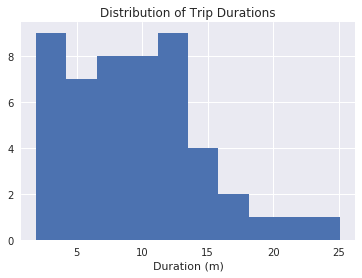

In [57]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [58]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
## Collect all of the trip times and use pyplot to generate a histogram of trip times.

def trip_times(filename, city):
    '''
        Get the trip times for each of the cities.
    '''
    
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize the variables
        trip_times_Washington = []
        trip_times_Chicago    = []
        trip_times_NYC        = []
        
        # Create the trip time list for each city
        for row in reader:
            if city == 'Washington':
                trip_times_Washington.append(float(row['duration']))
            elif city == 'Chicago':
                trip_times_Chicago.append(float(row['duration']))
            else:
                trip_times_NYC.append(float(row['duration']))
              
        # return the trip time list for each city
        if city == 'Washington':
            return trip_times_Washington
        elif city == 'Chicago':
            return trip_times_Chicago
        else:
            return trip_times_NYC
                
# Get the trip time list for each city
trip_times_Washington = trip_times(data_file_Washington, 'Washington')
trip_times_Chicago = trip_times(data_file_Chicago,'Chicago')
trip_times_NYC = trip_times(data_file_NYC,'NYC')

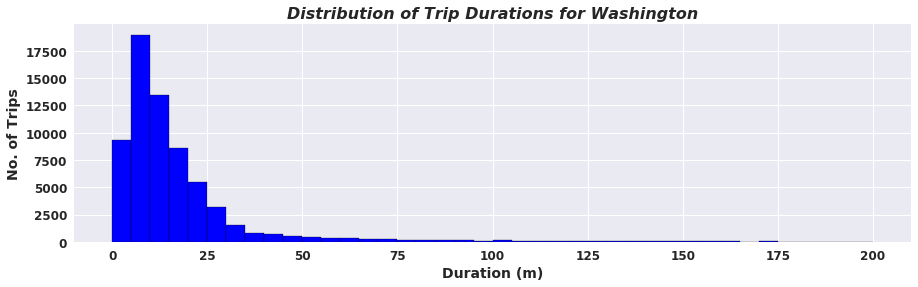

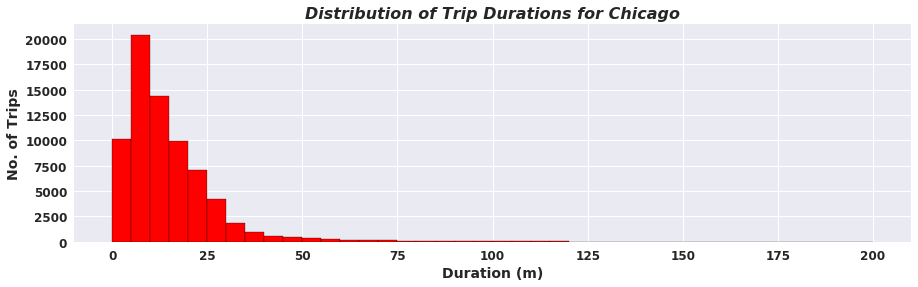

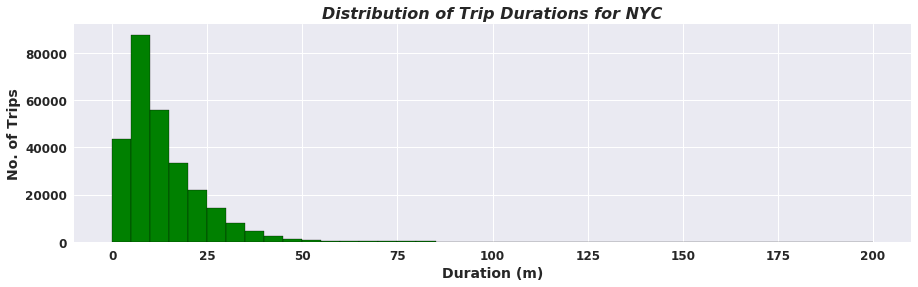

In [59]:
# Ref:https://stackoverflow.com/questions/16958430/matplotlib-histograms-and-labels
# Ref:https://stackoverflow.com/questions/42542252/cannot-get-histogram-to-show-separated-bins-with-vertical-lines
# Reference: https://www.youtube.com/watch?v=3Gt6wiXmJp0
# Plot the histogram of trip durations for each city
plt.style.use('seaborn')
plt.figure(figsize=(15,4))
plt.hist(trip_times_Washington , align=('mid'),range = (0, 200), bins = 40, color ='blue',label = ['Washington'],alpha=1,histtype='bar', ec='black')
plt.title('Distribution of Trip Durations for Washington',fontsize=16,style ='italic',weight='black')
plt.xlabel('Duration (m)',fontsize=14,weight='black')
plt.ylabel("No. of Trips",fontsize=14,weight='black')
plt.xticks(fontsize = 12,weight='black') 
plt.yticks(fontsize = 12,weight='black')
plt.show()

plt.figure(figsize=(15,4))
plt.hist(trip_times_Chicago , align=('mid'),range = (0, 200), bins = 40, color ='red' ,label = ['Chicago'],alpha=1,histtype='bar', ec='black')
plt.title('Distribution of Trip Durations for Chicago',fontsize=16,style ='italic',weight='black')
plt.xlabel('Duration (m)',fontsize=14,weight='black')
plt.ylabel("No. of Trips",fontsize=14,weight='black')
plt.xticks(fontsize = 12,weight='black') 
plt.yticks(fontsize = 12,weight='black')
plt.show()

plt.figure(figsize=(15,4))
plt.hist(trip_times_NYC , align=('mid'),range = (0, 200), bins = 40, color ='green' ,label = ['NYC'],alpha=1,histtype='bar', ec='black')
plt.title('Distribution of Trip Durations for NYC',fontsize=16,style ='italic',weight='black')
plt.xlabel('Duration (m)',fontsize=14,weight='black')
plt.ylabel("No. of Trips",fontsize=14,weight='black')
plt.xticks(fontsize = 12,weight='black') 
plt.yticks(fontsize = 12,weight='black')
plt.show()

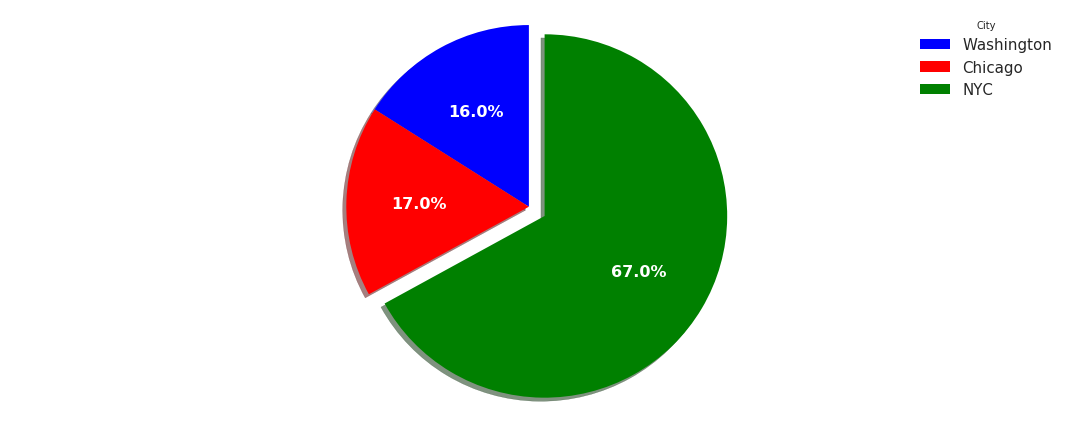

In [60]:
# Reference: https://pythonspot.com/matplotlib-pie-chart/
# Reference: https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
plt.figure(figsize=(15,6))
labels = 'trip_times_Washington', 'trip_times_Chicago','trip_times_NYC'
sizes = [16, 17,67]# get the percentage from MS Excel, No. of Trips (66326,72131,275638)for the cities respectivily .
colors = ['blue', 'red','green']
explode = (0, 0,0.1)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,textprops=dict(color="w",fontsize=16,weight="bold"))  
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=['Washington','Chicago','NYC'], loc="best",prop={'size': 15},title="City") 
plt.tight_layout()
plt.show()


If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: 

1.    For each group, where is the peak of each distribution? 
    - The peak is approximately at the Average Trip Duration (Mean).
2.    How would you describe the shape of each distribution? 
    - Most of the distributons are skewed to the right.


In [61]:
## Use this and additional cells to answer Question 5. ##

def trip_times_subs_cust(filename, city):
    '''
        Get the trip times for each of the cities.
    '''
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize the variables
        trip_times_subs_Washington = []
        trip_times_cust_Washington = []
        trip_times_subs_Chicago    = []
        trip_times_cust_Chicago    = []
        trip_times_subs_NYC        = []
        trip_times_cust_NYC        = []
        
        # Get the trip times for Subscribers and Customers for each city
        for row in reader:
            if city == 'Washington':
                if row['user_type'] == 'Subscriber':
                    trip_times_subs_Washington.append(float(row['duration']))
                else:
                    trip_times_cust_Washington.append(float(row['duration']))
            elif city == 'Chicago':
                if row['user_type'] == 'Subscriber':
                    trip_times_subs_Chicago.append(float(row['duration']))
                else:
                    trip_times_cust_Chicago.append(float(row['duration']))
            else:
                if row['user_type'] == 'Subscriber':
                    trip_times_subs_NYC.append(float(row['duration']))
                else:
                    trip_times_cust_NYC.append(float(row['duration']))
              
        # return trip duration of Subscribers and Customers for each city
        if city == 'Washington':
            return (trip_times_subs_Washington, trip_times_cust_Washington)
        elif city == 'Chicago':
            return (trip_times_subs_Chicago, trip_times_cust_Chicago)
        else:
            return (trip_times_subs_NYC, trip_times_cust_NYC)      

# Get trip duration of Subscribers and Customers for each city
trip_times_subs_Washington, trip_times_cust_Washington = trip_times_subs_cust(data_file_Washington, 'Washington')
trip_times_subs_Chicago   , trip_times_cust_Chicago    = trip_times_subs_cust(data_file_Chicago   , 'Chicago'   )
trip_times_subs_NYC       , trip_times_cust_NYC        = trip_times_subs_cust(data_file_NYC       , 'NYC'       )

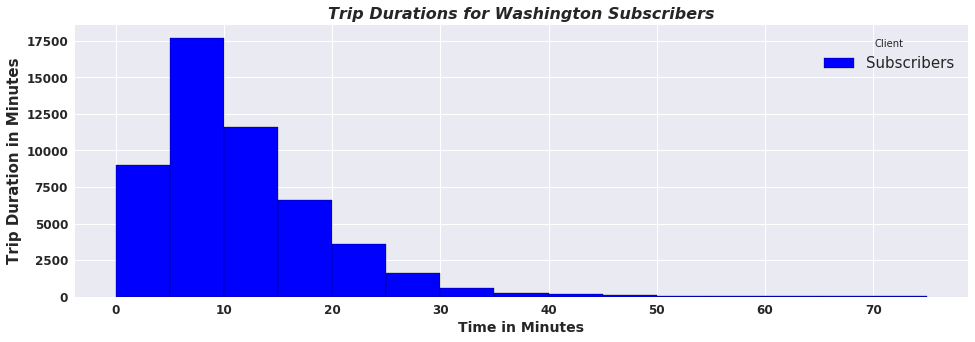

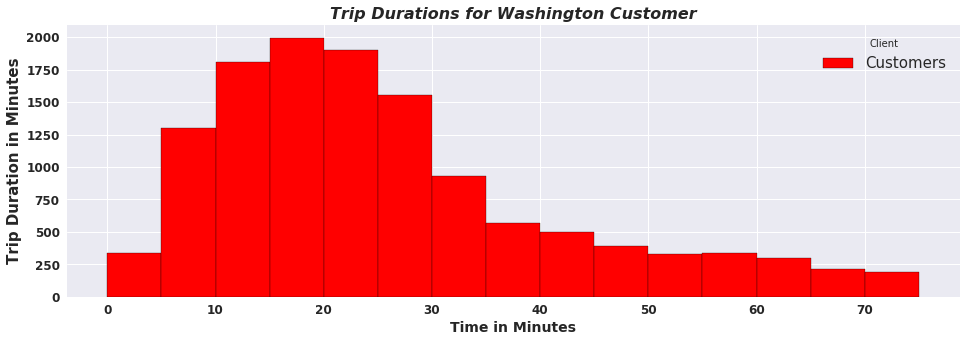

In [62]:
# Ref:https://stackoverflow.com/questions/16958430/matplotlib-histograms-and-labels
# Reference: https://www.youtube.com/watch?v=3Gt6wiXmJp0

plt.style.use('seaborn')

plt.figure(figsize=(16,5))
plt.title("Trip Durations for Washington Subscribers",fontsize=16,style ='italic',weight='black')
plt.hist(trip_times_subs_Washington , align=('mid'),range = (0, 75), bins = 15, color ='blue',label = ['Subscribers'],alpha=1,histtype='bar', ec='black')
plt.xlabel('Time in Minutes',fontsize=14,weight='black')
plt.ylabel("Trip Duration in Minutes",fontsize=15,weight='black')
plt.xticks(fontsize = 12,weight='black') 
plt.yticks(fontsize = 12,weight='black')
plt.legend(prop={'size': 15},title="Client")
plt.show()

plt.figure(figsize=(16,5))
plt.title("Trip Durations for Washington Customer",fontsize=16,style ='italic',weight='black')
plt.hist(trip_times_cust_Washington , align=('mid'),range = (0, 75), bins = 15, color ='red' ,label = ['Customers'],alpha=1,histtype='bar', ec='black')
plt.xlabel('Time in Minutes',fontsize=14,weight='black')
plt.ylabel("Trip Duration in Minutes",fontsize=15,weight='black')
plt.xticks(fontsize = 12,weight='black') 
plt.yticks(fontsize = 12,weight='black')
plt.legend(prop={'size': 15},title="Client")
plt.show()

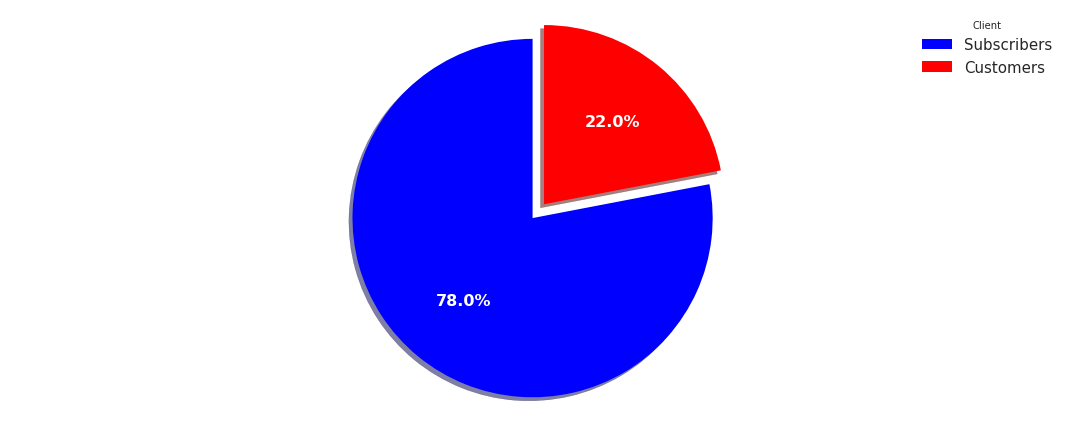

In [63]:
# Reference: https://pythonspot.com/matplotlib-pie-chart/
plt.figure(figsize=(15,6))
labels = 'trip_times_subs_Washington', 'trip_times_cust_Washington', 
sizes = [78.03, 21.97]# get the percentage from MS Excel, No. of Trips (Subscribers=51753,Customers=14573) 
                # and also from the answer pf the question Question 4a.
colors = ['blue', 'red']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,textprops=dict(color="w",fontsize=16,weight="bold")) 
plt.axis('equal')
plt.legend(labels=['Subscribers','Customers'], loc="best",prop={'size': 15},title="Client") 
plt.tight_layout()
plt.show()

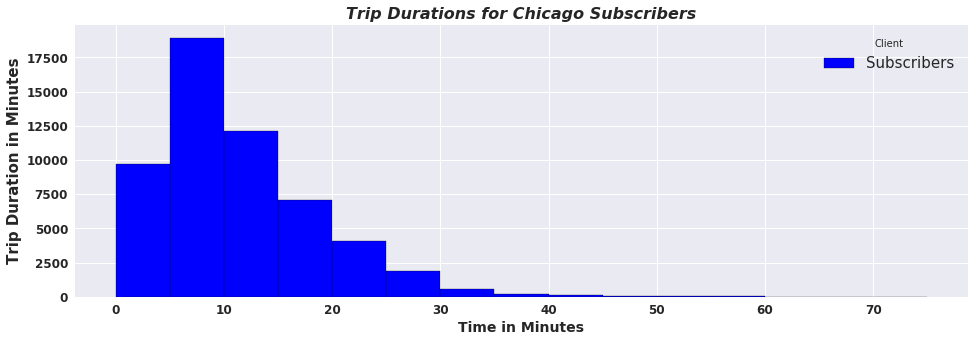

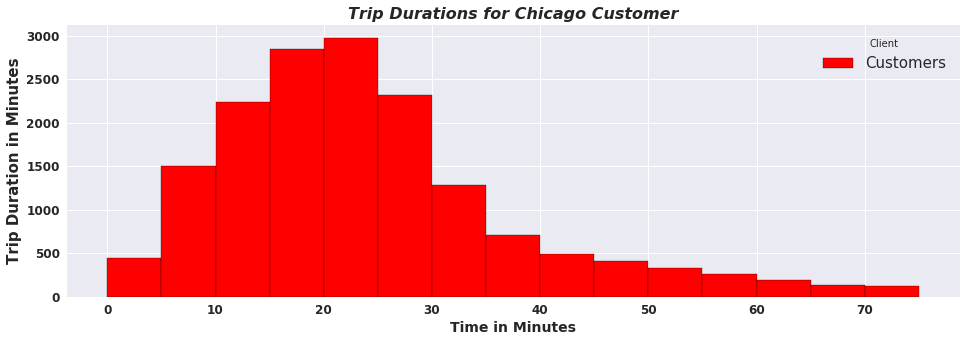

In [64]:
# Plot the histogram of trip durations for Chicago users

# Ref:https://stackoverflow.com/questions/16958430/matplotlib-histograms-and-labels
plt.style.use('seaborn')

plt.figure(figsize=(16,5))
plt.hist(trip_times_subs_Chicago , align=('mid'),range = (0, 75), bins = 15, color ='blue',label = ['Subscribers'],alpha=1,histtype='bar', ec='black')
plt.xlabel('Time in Minutes',fontsize=14,weight='black')
plt.ylabel("Trip Duration in Minutes",fontsize=15,weight='black')
plt.xticks(fontsize = 12,weight='black') 
plt.yticks(fontsize = 12,weight='black')
plt.title("Trip Durations for Chicago Subscribers",fontsize=16,style ='italic',weight='black')
plt.legend(prop={'size': 15},title="Client")
plt.show()

plt.figure(figsize=(16,5))
plt.hist(trip_times_cust_Chicago , align=('mid'),range = (0, 75), bins = 15, color ='red' ,label = ['Customers'],alpha=1,histtype='bar', ec='black')
plt.xlabel('Time in Minutes',fontsize=14,weight='black')
plt.ylabel("Trip Duration in Minutes",fontsize=15,weight='black')
plt.xticks(fontsize = 12,weight='black') 
plt.yticks(fontsize = 12,weight='black')
plt.title("Trip Durations for Chicago Customer",fontsize=16,style ='italic',weight='black')
plt.legend(prop={'size': 15},title="Client")
plt.show()

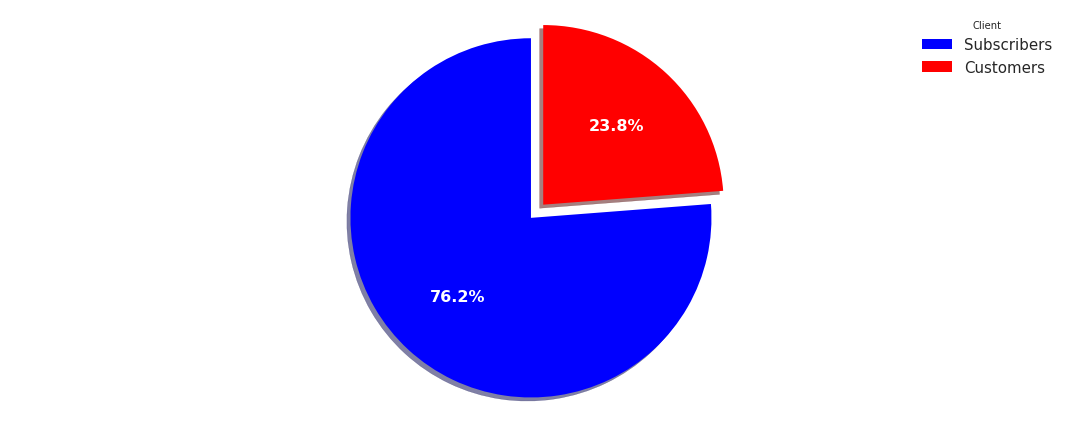

In [65]:
# Reference: https://pythonspot.com/matplotlib-pie-chart/
plt.figure(figsize=(15,6))
labels = 'trip_times_subs_Chicago', 'trip_times_cust_Chicago', 
sizes = [76.23, 23.77]# get the percentage from MS Excel, No. of Trips (Subscribers=54982,Customers=17149).
                # and also from the answer pf the question Question 4a.
colors = ['blue', 'red']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,textprops=dict(color="w",fontsize=16,weight="bold")) 
plt.axis('equal')
plt.legend(labels=['Subscribers','Customers'], loc="best",prop={'size': 15},title="Client") 
plt.tight_layout()
plt.show()

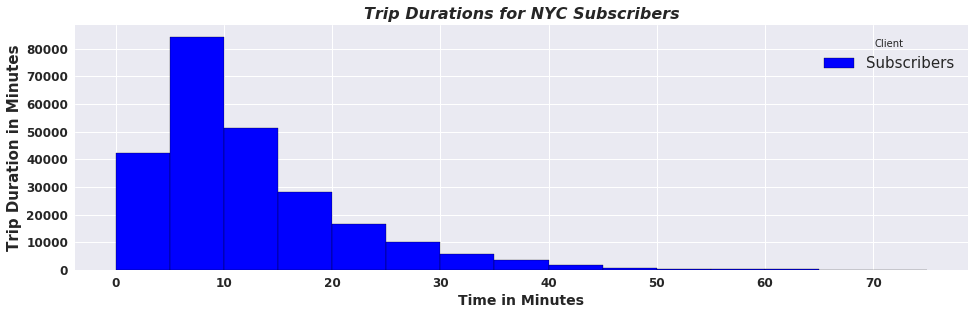

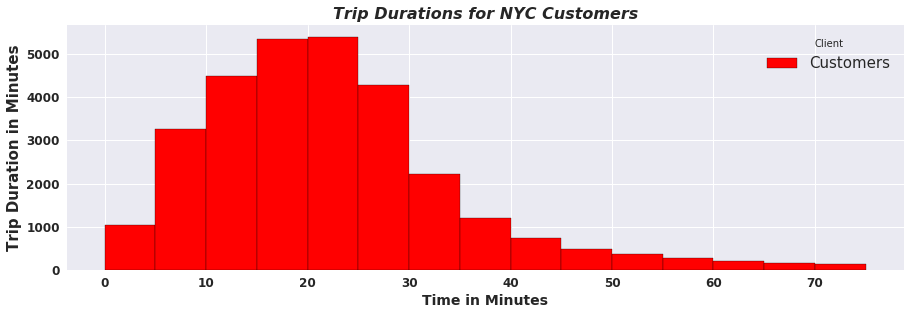

In [66]:
# Plot the histogram of trip durations for NYC users
# Ref:https://stackoverflow.com/questions/16958430/matplotlib-histograms-and-labels
plt.style.use('seaborn')

plt.figure(figsize=(16,4.5))
plt.hist(trip_times_subs_NYC , align=('mid'),range = (0, 75), bins = 15, color ='blue',label = ['Subscribers'],alpha=1,histtype='bar', ec='black')
plt.xlabel('Time in Minutes',fontsize=14,weight='black')
plt.ylabel("Trip Duration in Minutes",fontsize=15,weight='black')
plt.xticks(fontsize = 12,weight='black') 
plt.yticks(fontsize = 12,weight='black')
plt.title("Trip Durations for NYC Subscribers",fontsize=16,style ='italic',weight='black')
plt.legend(prop={'size': 15},title="Client")
plt.show()

plt.figure(figsize=(15,4.5))
plt.hist(trip_times_cust_NYC , align=('mid'),range = (0, 75), bins = 15, color ='red' ,label = ['Customers'],alpha=1,histtype='bar', ec='black')
plt.xlabel('Time in Minutes',fontsize=14,weight='black')
plt.ylabel("Trip Duration in Minutes",fontsize=15,weight='black')
plt.xticks(fontsize = 12,weight='black') 
plt.yticks(fontsize = 12,weight='black')
plt.title("Trip Durations for NYC Customers",fontsize=16,style ='italic',weight='black')
plt.legend(prop={'size': 15},title="Client")
plt.show()


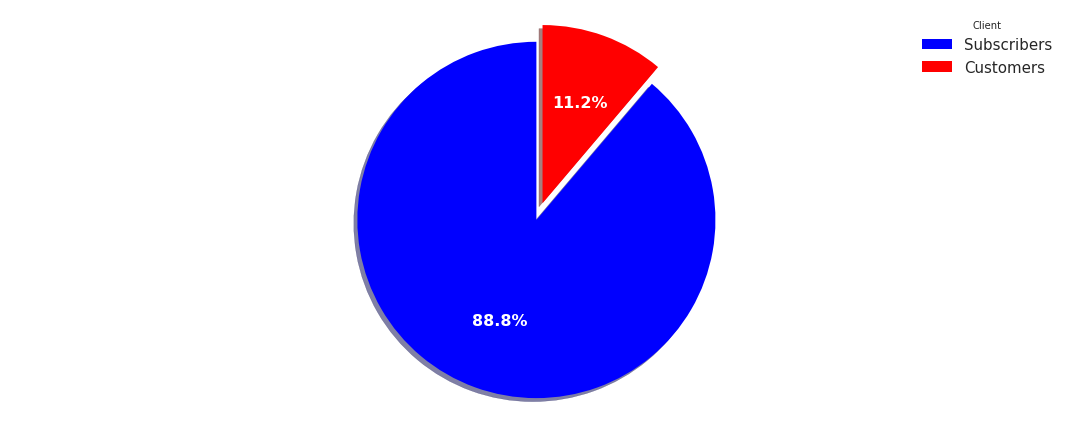

In [67]:
# Reference: https://pythonspot.com/matplotlib-pie-chart/
plt.figure(figsize=(15,6))
labels = 'trip_times_subs_NYC', 'trip_times_cust_NYC', 
sizes = [88.84, 11.16] # get the percentage from MS Excel, No. of Trips (Subscribers=245896,Customers=30185).
                       # and also from the answer pf the question Question 4a.
colors = ['blue', 'red']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,textprops=dict(color="w",fontsize=16,weight="bold")) 
plt.axis('equal')
plt.legend(labels=['Subscribers','Customers'], loc="best",prop={'size': 15},title="Client") 
plt.tight_layout()
plt.show()

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: Replace this text with your responses and include a visualization below!

In [68]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##


### More Analysis

#### We will try to analyze few more areas here:

1.    Is the pattern of ridership different on the weekends versus weekdays? 
    - Yes. On weekdays the average trip duration is high.
2.    On what days are Subscribers most likely to use the system? What about Customers? 
    - Subscribers are using the system mostly on weekdays and Customers are using the system mostly on weekends.



In [69]:
# Is the pattern of ridership different on the weekends versus weekdays?
def trips_by_day_of_week(filename):
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize the variables
        weekend_duration    = []
        weekend_no_of_rides = 0
        
        weekday_duration    = []
        weekday_no_of_rides = 0
        
        # Get the trip count and duration for weekends and weekdays.
        for row in reader:
            if row['day_of_week'] == 'Saturday' or row['day_of_week'] == 'Sunday':
                weekend_duration.append(float(row['duration']))
                weekend_no_of_rides = weekend_no_of_rides + 1
            else:
                weekday_duration.append(float(row['duration']))
                weekday_no_of_rides = weekday_no_of_rides + 1
            
        return (weekend_duration, weekend_no_of_rides, weekday_duration, weekday_no_of_rides)

weekend_duration, weekend_no_of_rides, weekday_duration, weekday_no_of_rides = trips_by_day_of_week(data_file_NYC)

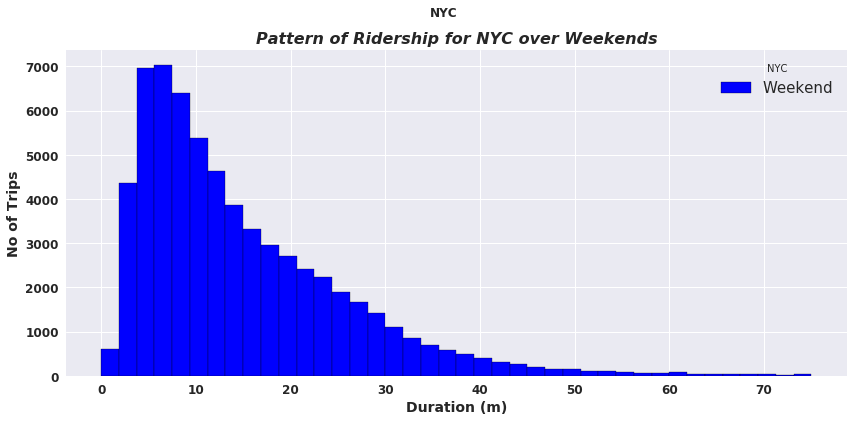

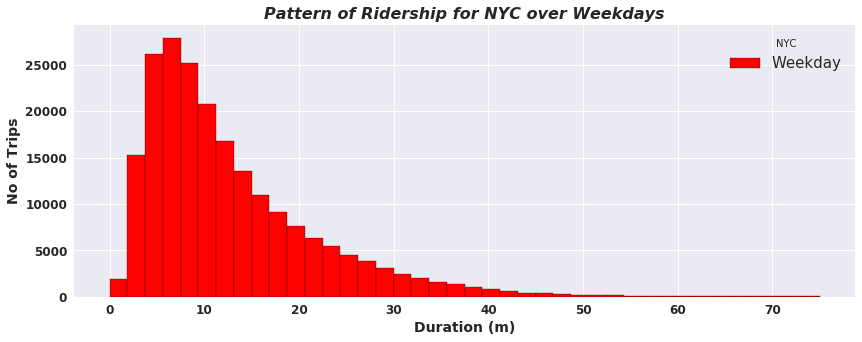

In [70]:
# Plot the histograms
plt.style.use('seaborn')

plt.figure(figsize=(14,6))
plt.suptitle('NYC',weight='black')
plt.hist(weekend_duration , align=('mid'),range = (0, 75), bins = 40, color ='blue',label = ['Weekend'],alpha=1,histtype='bar', ec='black')
plt.title('Pattern of Ridership for NYC over Weekends',fontsize=16,style ='italic',weight='black')
plt.xlabel('Duration (m)',fontsize=14,weight='black')
plt.ylabel("No of Trips" ,fontsize=14,weight='black')
plt.xticks(fontsize = 12,weight='black') 
plt.yticks(fontsize = 12,weight='black')
plt.legend(prop={'size': 15},title="NYC")
plt.show()

plt.figure(figsize=(14,5))
plt.hist(weekday_duration , align=('mid'),range = (0, 75), bins = 40, color ='red' ,label = ['Weekday'],alpha=1,histtype='bar', ec='black')
plt.title('Pattern of Ridership for NYC over Weekdays',fontsize=16,style ='italic',weight='black')
plt.xlabel('Duration (m)',fontsize=14,weight='black')
plt.ylabel("No of Trips" ,fontsize=14,weight='black')
plt.xticks(fontsize = 12,weight='black') 
plt.yticks(fontsize = 12,weight='black')
plt.legend(prop={'size': 15},title="NYC")
plt.show()


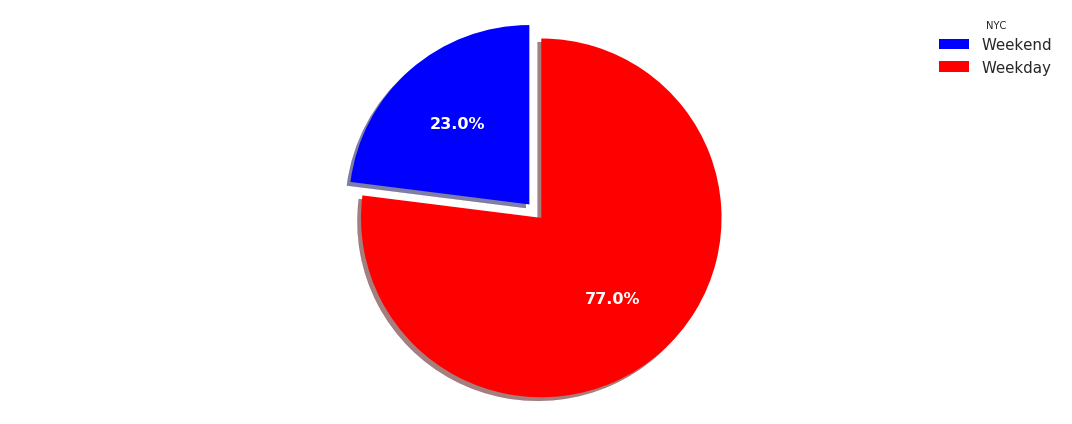

In [71]:
# Reference: https://pythonspot.com/matplotlib-pie-chart/
plt.figure(figsize=(15,6))
labels = 'weekend_duration', 'weekday_duration', 
sizes = [23, 77] # get the percentage from MS Excel, No. of Trips (Subscribers=245896,Customers=30185).
colors = ['blue', 'red']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,textprops=dict(color="w",fontsize=16,weight="bold")) 
plt.axis('equal')
plt.legend(labels=['Weekend','Weekday'], loc="best",prop={'size': 15},title="NYC") 
plt.tight_layout()
plt.show()

In [72]:
# On what days are Subscribers most likely to use the system? What about Customers?
# Does the average duration of rides change depending on the day of the week?
def trips_by_day(filename, user_type):
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize the variables
        days_of_week = {'Saturday':1,'Sunday':2,'Monday':3, 'Tuesday':4, 'Wednesday':5, 'Thursday':6, 'Friday':7 }
        trips_day_of_week = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}
        
        # Get the trip count for Subscribers and Customers for each day of the week
        for row in reader:
            if user_type == 'Subscriber' and row['user_type'] == 'Subscriber':
                trips_day_of_week[days_of_week[row['day_of_week']]] += 1
            elif user_type == 'Customer' and row['user_type'] == 'Customer':
                trips_day_of_week[days_of_week[row['day_of_week']]] += 1
                
        return (trips_day_of_week)

trips_day_of_week_subs = trips_by_day(data_file_NYC, 'Subscriber')
print("Subscriber Trips by Day of Week => " + str(trips_day_of_week_subs))

trips_day_of_week_cust = trips_by_day(data_file_NYC, 'Customer')
print("Customer Trips by Day of Week => " + str(trips_day_of_week_cust))

Subscriber Trips by Day of Week => {1: 26126, 2: 24454, 3: 35623, 4: 39487, 5: 41403, 6: 41197, 7: 37606}
Customer Trips by Day of Week => {1: 7069, 2: 6776, 3: 3620, 4: 2833, 5: 3152, 6: 3065, 7: 3670}


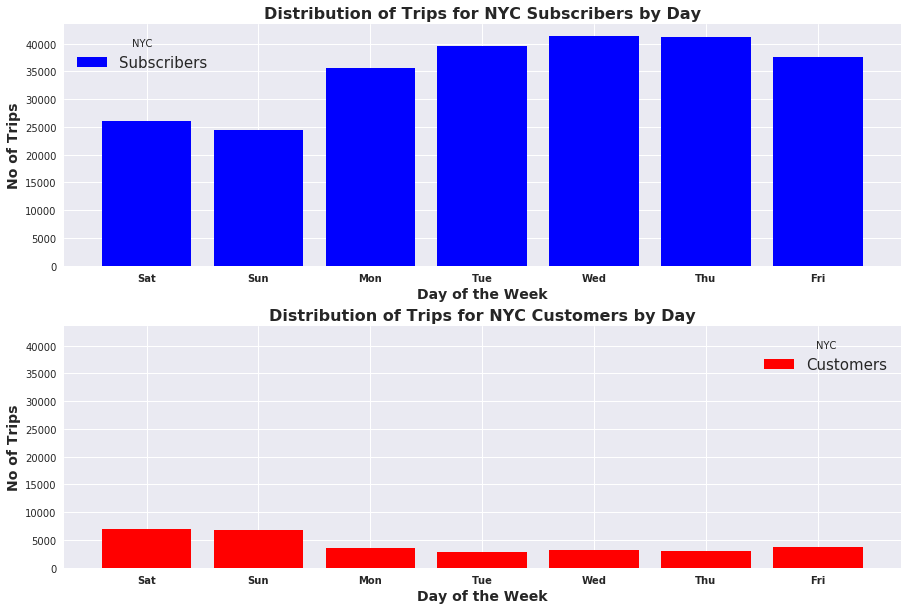

In [73]:
# Reference : https://www.youtube.com/watch?v=iedmZlFxjfA
# Reference : https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html
# Reference : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
# Reference : https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticks.html
# Reference : https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html
# Reference : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html
# Reference : https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_title.html
# Reference : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

# Figure design 

f, (plt1, plt2) = plt.subplots(2, sharey=True)

f.subplots_adjust(hspace=0.25)
f.set_figheight(10)
f.set_figwidth(15)

# Plot the bar chart for NYC Subscribers
plt1.bar(list(trips_day_of_week_subs.keys()), trips_day_of_week_subs.values(),color ='blue',label= 'Subscribers')
plt1.set_xticks(list(trips_day_of_week_subs.keys()))
plt1.set_xticklabels(['Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri'],weight='black')
plt1.set_xlabel("Day of the Week",fontsize=14,weight='black')
plt1.set_ylabel('No of Trips',fontsize=14,weight='black')
plt1.set_title('Distribution of Trips for NYC Subscribers by Day',fontsize=16,weight='black')
plt1.legend(prop={'size': 15},title="NYC")

# Plot the bar chart for NYC Customers
plt2.bar(list(trips_day_of_week_cust.keys()), trips_day_of_week_cust.values(),color ='red',label= 'Customers')
plt2.set_xticks(list(trips_day_of_week_cust.keys()))
plt2.set_xticklabels(['Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri'],weight='black')
plt2.set_xlabel("Day of the Week",fontsize=14,weight='black')
plt2.set_ylabel('No of Trips',fontsize=14,weight='black')
plt2.set_title('Distribution of Trips for NYC Customers by Day',fontsize=16,weight='black')
plt2.legend(prop={'size': 15},title="NYC")

plt.show()

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: 
I need to learn more about data analysis and focus mainly on machine learning for trading to minimize the risk and gain maximum benefits and also in my work, I am working in a simulation models in petroleum industry and using history matching techniques and optimization and the root science of these topics is linear regression and neural network and now in the software that I am using we have editor to write code in Python to show specific results or operate some calculations inside the software, which is a powerful tool to intervene inside the software and type my codes.

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0